# Setup

In [2]:
import numpy as np
import pandas as pd
import scipy.io
from scipy.stats import pearsonr
import itertools
import h5py
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Crop Classification (single image)

In [ ]:
do_indian_pines = False  # (1992) https://purr.purdue.edu/publications/1947/1
do_salinas = False  # https://paperswithcode.com/dataset/salinas

## Marshland Vegetation Classification (single image)

In [ ]:
do_kennedy_space = False  # (1996) https://paperswithcode.com/dataset/kennedy-space-center

## Urban Land Cover Classification (single image)

In [ ]:
do_pavia_u = False  # https://paperswithcode.com/dataset/pavia-university

## Soil Moisture Regression (single image)

In [3]:
do_soil_moisture = False # (2017) https://www.kaggle.com/datasets/binaryjoker/hyperspectral-benchmark-dataset-on-soil-moisture

## Salient Object Instance Segmentation, multiple images

In [ ]:
do_salient_objects = False  # (2018) https://github.com/gistairc/HS-SOD

## Overlapping Plastic Flakes Semantic Segmentation, multiple images 

In [ ]:
do_plastic_flakes = False  # (2022) https://www.kaggle.com/datasets/mayaaghaei/hyperspectral-overlap-dataset-hsod

## Coffee Type Classification, single image 

In [ ]:
do_coffee = False  # (2020) https://www.kaggle.com/datasets/hacarus/near-infrared-hyperspectral-image

## Cancer Cells Instance Segmentation, multiple images

In [ ]:
do_choledoch_cancer = False  # (2019) https://www.kaggle.com/datasets/ethelzq/multidimensional-choledoch-database?select=P

# Load & Visualize Data

In [2]:
#load data
dataset = 'IndianPines'

if dataset == 'IndianPines':
    data = h5py.File('data/original_paper/data4classification/indian_pines_randomSampling_0.1_run_1.mat', 'r')
    selected_bands = scipy.io.loadmat('data/original_paper/results/drl_30_bands_indian_pines.mat')
elif dataset == 'Botswana':
    data = scipy.io.loadmat('data/original_paper/data4classification/botswana_randomSampling_0.1_run_1.mat')
    selected_bands = scipy.io.loadmat('data/original_paper/results/drl_30_bands_botswana.mat')
    

In [3]:
if dataset == 'IndianPines':
    x_train = np.array(data['x_tra']).transpose()
    y_train = np.argmax(np.array(data['y_tra']).transpose(), axis=1)
    x_test = np.array(data['x_test']).transpose()
    y_test = np.argmax(np.array(data['y_test']).transpose(), axis=1)

elif dataset == 'Botswana':
    x_train = np.array(data['x_tra'])
    y_train = np.argmax(np.array(data['y_tra']), axis=1)
    x_test = np.array(data['x_test'])
    y_test = np.argmax(np.array(data['y_test']), axis=1)
        
selected_bands = selected_bands['selected_bands'][0].astype(int)

In [4]:
x_train.shape

(1043, 200)

In [5]:
y_train.shape

(1043,)

In [6]:
x_test.shape

(9323, 200)

In [7]:
y_test.shape

(9323,)

In [11]:
def runAvgCorrelation(x_test):
    x_test = pd.DataFrame(x_test)
    
    correlations = {}
    columns = x_test.columns.tolist()

    for col_a, col_b in itertools.combinations(columns, 2):
        correlations[str(col_a) + '__' + str(col_b)] = pearsonr(x_test.loc[:, col_a], x_test.loc[:, col_b])

    result = pd.DataFrame.from_dict(correlations, orient='index')
    result.columns = ['PCC', 'p-value']

    return result['PCC'].sum()/len(result['PCC']), result['PCC']
    
    

In [12]:
#running the correlation using all  bands
a, b = runAvgCorrelation(x_test)

In [14]:
b.min()

-0.6507193376262812

In [22]:
#running the correlation using researchers selected bands
x_test_researchers_band = x_test[:, selected_bands]
runAvgCorrelation(x_test_researchers_band)

0.28610255865592354

In [23]:
#running the correlation using randomly selected bands
corr = []
available_bands = np.arange(0, x_test.shape[1], 1)
iterations = 200
for i in range(iterations):
    
    sample_bands = np.random.choice(available_bands, 30, replace=False)
    
    x_test_random_bands = x_test[:, sample_bands]
    corr.append(runAvgCorrelation(x_test_random_bands))

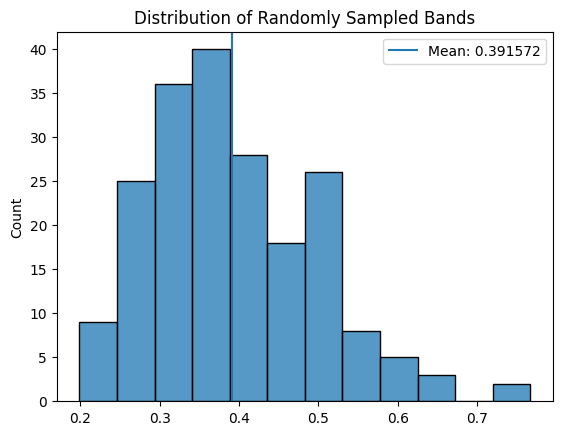

In [24]:
mean_corr = np.mean(corr)

sns.histplot(corr)
plt.axvline(mean_corr, label=f'Mean: {mean_corr:.6f}')
plt.title('Distribution of Randomly Sampled Bands')
plt.legend()
plt.show()